In [29]:
#import requried libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


In [30]:

# List of file
# Upload data
file_paths = ["_1.csv", "_2.csv", "_3.csv", "_4.csv", "_5.csv", "_6.csv", "_7.csv", "_8.csv", "_9.csv", "_10.csv"]

In [31]:
# Initialize empty list for storing individual models
models = []
accuracies = []
losses = []

# Loop through each file
for file_path in file_paths:
    # Load the dataset
    data = pd.read_csv(file_path)

    # Separate features (input) and labels (output)
    X = data.iloc[:, :-1].values  # Input sequence
    y = data.iloc[:, -1].values  # Labels (normal or malicious)

    # Encode labels
    label_encoder = LabelEncoder()
    y = label_encoder.fit_transform(y)

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Reshape the input sequences for LSTM
    n_features = X_train.shape[1]
    X_train = X_train.reshape((X_train.shape[0], 1, n_features))
    X_test = X_test.reshape((X_test.shape[0], 1, n_features))

    # Build the LSTM model
    model = keras.Sequential()
    model.add(keras.layers.LSTM(50, input_shape=(1, n_features), return_sequences=True))
    model.add(keras.layers.LSTM(50))
    model.add(keras.layers.Dense(1, activation='sigmoid'))

    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model
    history = model.fit(X_train, y_train, epochs=5, batch_size=500, verbose=1, validation_data=(X_test, y_test))

    # Append the model to the list of models
    models.append(model)

    # Evaluate the model on the test data
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    accuracies.append(accuracy)
    losses.append(loss)

Epoch 1/5
122/122 [==============================] - 8s 21ms/step - loss: 0.1511 - accuracy: 0.9973 - val_loss: 0.0047 - val_accuracy: 1.0000
Epoch 2/5
122/122 [==============================] - 2s 13ms/step - loss: 0.0020 - accuracy: 0.9999 - val_loss: 6.5838e-04 - val_accuracy: 1.0000
Epoch 3/5
122/122 [==============================] - 2s 13ms/step - loss: 5.4955e-04 - accuracy: 0.9999 - val_loss: 3.6176e-04 - val_accuracy: 1.0000
Epoch 4/5
122/122 [==============================] - 2s 13ms/step - loss: 3.6415e-04 - accuracy: 0.9999 - val_loss: 2.2704e-04 - val_accuracy: 1.0000
Epoch 5/5
122/122 [==============================] - 2s 13ms/step - loss: 2.6606e-04 - accuracy: 0.9999 - val_loss: 1.7534e-04 - val_accuracy: 1.0000
Epoch 1/5
77/77 [==============================] - 9s 27ms/step - loss: 0.2627 - accuracy: 0.9758 - val_loss: 0.0226 - val_accuracy: 0.9999
Epoch 2/5
77/77 [==============================] - 1s 15ms/step - loss: 0.0088 - accuracy: 0.9999 - val_loss: 0.0032 - val

In [32]:

# Calculate average accuracy and loss
avg_accuracy = np.mean(accuracies)
avg_loss = np.mean(losses)

# Create a cumulative model by averaging the weights of individual models
cumulative_model = keras.models.clone_model(models[0])
cumulative_model.set_weights(models[0].get_weights())

for i in range(1, len(models)):
    weights = models[i].get_weights()
    cumulative_weights = cumulative_model.get_weights()
    for j in range(len(weights)):
        cumulative_weights[j] += weights[j]
    cumulative_model.set_weights(cumulative_weights)

# Average the weights of the cumulative model
cumulative_weights = cumulative_model.get_weights()
for i in range(len(cumulative_weights)):
    cumulative_weights[i] /= len(models)
cumulative_model.set_weights(cumulative_weights)

# Save the cumulative model
#cumulative_model.save('cumulative_model.h5')



Average Accuracy: 0.9986124396324157
Average Loss: 0.12778386861318722


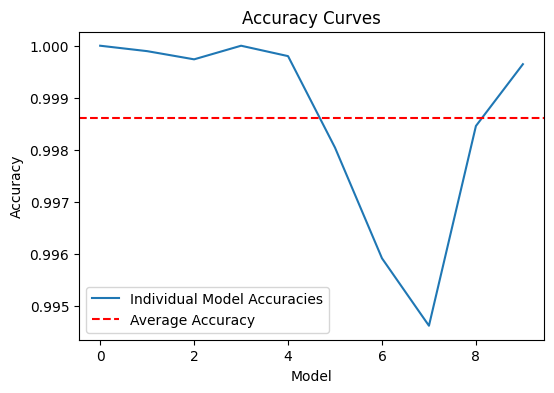

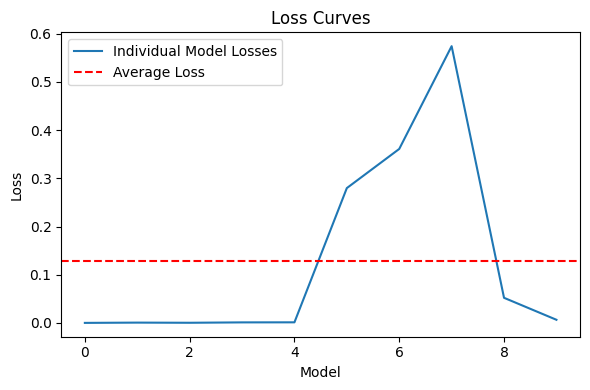

In [33]:
# Print average results
print("Average Accuracy:", avg_accuracy)
print("Average Loss:", avg_loss)

# Plot accuracy and loss curves
plt.figure(figsize=(6, 4))
plt.plot(accuracies, label='Individual Model Accuracies')
plt.axhline(avg_accuracy, color='r', linestyle='--', label='Average Accuracy')
plt.title('Accuracy Curves')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.legend()

plt.figure(figsize=(6, 4))
plt.plot(losses, label='Individual Model Losses')
plt.axhline(avg_loss, color='r', linestyle='--', label='Average Loss')
plt.title('Loss Curves')
plt.xlabel('Model')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()
